<a href="https://colab.research.google.com/github/DH-HUB/JODataExploration/blob/main/jodataexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**
Ce projet a pour objectif d'explorer les caract√©ristiques des athl√®tes participant aux Jeux Olympiques d‚Äôhiver, √† partir du jeu de donn√©es historique des comp√©titions de 1896 √† 2016.
L‚Äôanalyse se concentre sur l‚Äô√©tude des relations entre les variables quantitatives (√¢ge, taille, poids) et qualitatives (m√©daille, sexe, sport, pays), √† travers des visualisations interactives avec la biblioth√®que Plotly.
L‚Äôensemble du travail est orient√© vers une compr√©hension fine des profils types d‚Äôathl√®tes, avec pour finalit√© la pr√©paration d‚Äôun mod√®le de machine learning permettant de pr√©dire la probabilit√© pour un athl√®te de remporter une m√©daille.


**Probl√©matiques**
Quels sont les profils types d‚Äôathl√®tes qui obtiennent une m√©daille ?
L‚Äôobjectif est d‚Äôidentifier les variables influentes telles que l‚Äô√¢ge, le sexe, la taille, ou le sport pratiqu√©.

Existe-t-il une variation de la morphologie ou de l‚Äô√¢ge selon le sport ou le type de m√©daille ?
Cette question vise √† comprendre s‚Äôil existe un profil physique r√©current pour certaines disciplines.

Comment les caract√©ristiques des athl√®tes ont-elles √©volu√© dans le temps ?
L‚Äôid√©e est de d√©tecter d‚Äô√©ventuelles tendances g√©n√©rationnelles (√¢ge, participation f√©minine, taille moyenne, etc.).

Certains pays ou sports sont-ils syst√©matiquement surrepr√©sent√©s parmi les m√©daill√©s ?
Cette derni√®re probl√©matique permet d‚Äôexplorer les sp√©cialisations nationales ou les biais g√©ographiques li√©s √† la performance.

**Plan du notebook**
Pr√©paration des donn√©es

Chargement du fichier

Nettoyage : doublons, valeurs manquantes

S√©lection des variables utiles

**Exploration visuelle :**

1- Histogramme avec courbe de densit√© (KDE) ‚Äî utilis√© pour explorer la
   r√©partition  d'une variable num√©rique continue.

2- Violin Plot :R√©partition de l‚Äô√¢ge par m√©daille et sexe

3- Boxplot : Analyse de la taille selon le sport

4- Boxplot: Analyse d'√©volution de l‚Äô√¢ge des athl√®tes dans le temps par sexe

5- Barres empil√©es: Comparaison des performances par pays (2012 vs 2016)

Interpr√©tations

Interpr√©tations et storytelling

Analyse graphique int√©gr√©e

Profils types et dynamiques visuelles

Ouverture vers la mod√©lisation

Construction de la variable cible HasMedal

Pr√©paration d‚Äôun dataset pour le machine learning


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akash1vishwakarma/athlete-eventscsv

Dataset URL: https://www.kaggle.com/datasets/akash1vishwakarma/athlete-eventscsv
License(s): unknown


In [ ]:
!unzip athlete-eventscsv.zip

Archive:  athlete-eventscsv.zip
  inflating: athlete_events.csv      


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from IPython.display import display
import pandas as pd

#Chargement du dataset
df = pd.read_csv("athlete_events.csv")

#Affichage des 10 premi√®res lignes
display(df.head(10))

#Affichage des 10 enregistrements les plus anciens
display(df.sort_values(by='Year').head(10))

#Affichage des 10 enregistrements les plus r√©cents
display(df.sort_values(by='Year', ascending=False).head(10))

#Calcul et affichage des moyennes pour les colonnes quantitatives principales
mean_values = df[['Age', 'Height', 'Weight']].mean()
print("\nMoyennes des colonnes quantitatives")
print(mean_values)


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

ID                           Name Sex   Age  Height  Weight  \
107719   54456         Alexander Viggo Jensen   M  21.0     NaN     NaN   
107718   54456         Alexander Viggo Jensen   M  21.0     NaN     NaN   
148752   74612   Julius Carl Fritz Manteuffel   M  21.0     NaN    62.0   
148751   74612   Julius Carl Fritz Manteuffel   M  21.0     NaN    62.0   
70204    35741            Gustav Felix Flatow   M  21.0     NaN     NaN   
70203    35741            Gustav Felix Flatow   M  21.0     NaN     NaN   
221836  111499  Kristian Henrik Rudolf Sjberg   M  21.0     NaN     NaN   
148753   74612   Julius Carl Fritz Manteuffel   M  21.0     NaN    62.0   
24682    12929          John Mary Pius Boland   M  25.0     NaN     NaN   
180285   90606              John Bryant Paine   M  25.0     NaN     NaN   

                 Team  NOC        Games  Year  Season    City       Sport  \
107719        Denmark  DEN  1896 Summer  1896  Summer  Athina    Shooting   
107718        Denmark  DEN  1896 Summer  1896  Summer  Athina    Shooting   
148752        Germany  GER  1896 Summer  1896  Summer  Athina  Gymnastics   
148751        Germany  GER  1896 Summer  1896  Summer  Athina  Gymnastics   
70204         Germany  GER  1896 Summer  1896  Summer  Athina  Gymnastics   
70203         Germany  GER  1896 Summer  1896  Summer  Athina  Gymnastics   
221836         Sweden  SWE  1896 Summer  1896  Summer  Athina   Athletics   
148753        Germany  GER  1896 Summer  1896  Summer  Athina  Gymnastics   
24682   Great Britain  GBR  1896 Summer  1896  Summer  Athina      Tennis   
180285  United States  USA  1896 Summer  1896  Summer  Athina    Shooting   

                                                    Event   Medal  
107719          Shooting Men's Military Rifle, 200 metres     NaN  
107718  Shooting Men's Free Rifle, Three Positions, 30...  Bronze  
148752                     Gymnastics Men's Parallel Bars     NaN  
148751                       Gymnastics Men's Horse Vault     NaN  
70204               Gymnastics Men's Parallel Bars, Teams    Gold  
70203                      Gymnastics Men's Parallel Bars     NaN  
221836                         Athletics Men's 100 metres     NaN  
148753              Gymnastics Men's Parallel Bars, Teams    Gold  
24682                                Tennis Men's Singles    Gold  
180285          Shooting Men's Military Pistol, 25 metres    Gold

ID                    Name Sex   Age  Height  Weight      Team  \
89007    45126            Hemza Haloui   M  22.0   180.0    96.0   Algeria   
235174  117924       Masanao Takahashi   M  34.0   170.0    65.0     Japan   
55010    28193  Clio Emilson Ucha Dias   M  23.0   192.0    90.0  Portugal   
158762   79712      Martyna Mikoajczak   F  25.0   176.0    57.0    Poland   
158763   79713     Artur Mikoajczewski   M  26.0   180.0    73.0    Poland   
158768   79714        Beata Mikoajczyk   F  30.0   170.0    68.0    Poland   
158769   79714        Beata Mikoajczyk   F  30.0   170.0    68.0    Poland   
54985    28182         Maimouna Diarra   F  25.0   198.0    90.0   Senegal   
235130  117905     Tammy Galera Takagi   F  25.0   161.0    59.0    Brazil   
235133  117908         Ayaka Takahashi   F  26.0   165.0    60.0     Japan   

        NOC        Games  Year  Season            City          Sport  \
89007   ALG  2016 Summer  2016  Summer  Rio de Janeiro      Wrestling   
235174  JPN  2016 Summer  2016  Summer  Rio de Janeiro  Equestrianism   
55010   POR  2016 Summer  2016  Summer  Rio de Janeiro           Judo   
158762  POL  2016 Summer  2016  Summer  Rio de Janeiro         Rowing   
158763  POL  2016 Summer  2016  Summer  Rio de Janeiro         Rowing   
158768  POL  2016 Summer  2016  Summer  Rio de Janeiro       Canoeing   
158769  POL  2016 Summer  2016  Summer  Rio de Janeiro       Canoeing   
54985   SEN  2016 Summer  2016  Summer  Rio de Janeiro     Basketball   
235130  BRA  2016 Summer  2016  Summer  Rio de Janeiro         Diving   
235133  JPN  2016 Summer  2016  Summer  Rio de Janeiro      Badminton   

                                             Event   Medal  
89007     Wrestling Men's Heavyweight, Greco-Roman     NaN  
235174          Equestrianism Mixed Dressage, Team     NaN  
55010                      Judo Men's Middleweight     NaN  
158762    Rowing Women's Lightweight Double Sculls     NaN  
158763      Rowing Men's Lightweight Double Sculls     NaN  
158768  Canoeing Women's Kayak Doubles, 500 metres  Bronze  
158769    Canoeing Women's Kayak Fours, 500 metres     NaN  
54985                Basketball Women's Basketball     NaN  
235130     Diving Women's Synchronized Springboard     NaN  
235133                   Badminton Women's Doubles    Gold


Moyennes des colonnes quantitatives
Age        25.556898
Height    175.338970
Weight     70.702393
dtype: float64


In [ ]:

#Suppression des doublons
df.drop_duplicates(inplace=True)

#Cr√©ation d'une variable binaire : a-t-il une m√©daille ?
df['HasMedal'] = df['Medal'].notna().astype(int)

#S√©lection des colonnes pertinentes pour l'analyse
colonnes_utiles = [
    'Name', 'Sex', 'Age', 'Height', 'Weight',
    'Team', 'NOC', 'Sport', 'Event', 'Year', 'Season',
    'City', 'Medal', 'HasMedal'
]
df = df[colonnes_utiles]

#Suppression des lignes avec valeurs manquantes critiques
# (√¢ge, taille, poids sont essentiels pour les profils athl√®tes)
df_cleaned = df.dropna(subset=['Age', 'Height', 'Weight','Medal'])

# Aper√ßu du r√©sultat
print(f"Nombre de lignes apr√®s nettoyage : {df_cleaned.shape[0]}")
df_cleaned.head()

Nombre de lignes apr√®s nettoyage : 30181


Name Sex   Age  Height  Weight     Team  NOC  \
40  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  Finland  FIN   
41   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

         Sport                                   Event  Year  Season    City  \
40  Ice Hockey             Ice Hockey Men's Ice Hockey  2014  Winter   Sochi   
41  Gymnastics  Gymnastics Men's Individual All-Around  1948  Summer  London   
42  Gymnastics        Gymnastics Men's Team All-Around  1948  Summer  London   
44  Gymnastics            Gymnastics Men's Horse Vault  1948  Summer  London   
48  Gymnastics        Gymnastics Men's Pommelled Horse  1948  Summer  London   

     Medal  HasMedal  
40  Bronze         1  
41  Bronze         1  
42    Gold         1  
44    Gold         1  
48    Gold         1

In [ ]:
#Statistiques de base
print(df_cleaned[['Age', 'Height', 'Weight']].describe())

#D√©tection de valeurs aberrantes
mask_aberrant = (df_cleaned['Height'] < 140) | (df_cleaned['Height'] > 230) | \
                (df_cleaned['Weight'] < 30) | (df_cleaned['Weight'] > 200) | \
                (df_cleaned['Age'] < 10) | (df_cleaned['Age'] > 60)

print(f"Nombre de lignes suspectes : {mask_aberrant.sum()}")
df_cleaned[mask_aberrant].head()


                Age        Height        Weight
count  30181.000000  30181.000000  30181.000000
mean      25.429012    177.642358     73.753554
std        5.049684     10.924188     15.004992
min       13.000000    136.000000     28.000000
25%       22.000000    170.000000     63.000000
50%       25.000000    178.000000     73.000000
75%       28.000000    185.000000     83.000000
max       66.000000    223.000000    182.000000
Nombre de lignes suspectes : 15


Name Sex   Age  Height  Weight  \
13741                          Oana Mihaela Ban   F  18.0   139.0    36.0   
23763                            Loredana Boboc   F  16.0   139.0    32.0   
69216  Mariya Yevgenyevna Filatova (-Kurbatova)   F  14.0   136.0    30.0   
69222  Mariya Yevgenyevna Filatova (-Kurbatova)   F  19.0   136.0    30.0   
69225  Mariya Yevgenyevna Filatova (-Kurbatova)   F  19.0   136.0    30.0   

               Team  NOC       Sport                               Event  \
13741       Romania  ROU  Gymnastics  Gymnastics Women's Team All-Around   
23763       Romania  ROU  Gymnastics  Gymnastics Women's Team All-Around   
69216  Soviet Union  URS  Gymnastics  Gymnastics Women's Team All-Around   
69222  Soviet Union  URS  Gymnastics  Gymnastics Women's Team All-Around   
69225  Soviet Union  URS  Gymnastics      Gymnastics Women's Uneven Bars   

       Year  Season      City   Medal  HasMedal  
13741  2004  Summer    Athina    Gold         1  
23763  2000  Summer    Sydney    Gold         1  
69216  1976  Summer  Montreal    Gold         1  
69222  1980  Summer    Moskva    Gold         1  
69225  1980  Summer    Moskva  Bronze         1

In [ ]:
#Supprimer les 15 lignes aberrantes
df_cleaned = df_cleaned[~mask_aberrant]
print(f"Nombre de lignes apr√®s suppression des valeurs aberrantes : {df_cleaned.shape[0]}")

Nombre de lignes apr√®s suppression des valeurs aberrantes : 30166


**Histogramme avec courbe de densit√© (KDE) ‚Äî utilis√© pour explorer la r√©partition  d'une variable num√©rique continue**

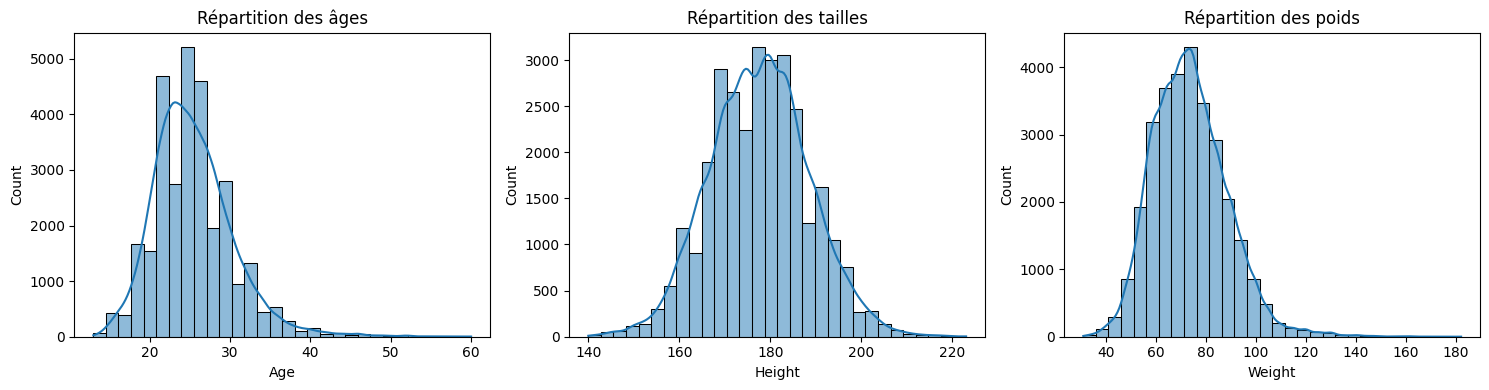

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_cleaned['Age'], bins=30, kde=True, ax=axs[0])
axs[0].set_title("R√©partition des √¢ges")

sns.histplot(df_cleaned['Height'], bins=30, kde=True, ax=axs[1])
axs[1].set_title("R√©partition des tailles")

sns.histplot(df_cleaned['Weight'], bins=30, kde=True, ax=axs[2])
axs[2].set_title("R√©partition des poids")

plt.tight_layout()
plt.show()

#V√©rification visuelle du nettoyage des donn√©es :
#La r√©partition des √¢ges montre une concentration r√©aliste entre 18 et 30 ans,
#avec suppression r√©ussie des valeurs extr√™mes <10 ou >60 ans.
#La taille suit une distribution normale centr√©e,
#sans valeurs aberrantes visibles.
#Le poids pr√©sente une asym√©trie logique (sports √† poids variables), avec une concentration entre
#60 et 90 kg et aucune valeur extr√™me >200 kg. Le nettoyage des variables num√©riques est valid√©, les donn√©es sont pr√™tes pour l'analyse ou la mod√©lisation.

In [ ]:
#R√©initialisation de l'index
df_cleaned.reset_index(drop=True, inplace=True)

**Violin Plot :R√©partition de l‚Äô√¢ge par m√©daille et sexe**



In [ ]:
import plotly.graph_objects as go
from IPython.display import display, Markdown
import pandas as pd

#Fonction de storytelling affich√© sous le graphique
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### üìå {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypoth√®se / Action** : {hypothese}
"""
    display(Markdown(texte))

#Donn√©es filtr√©es
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter'].copy()

#Ajouter une colonne pour x virtuel
df_winter['Group'] = df_winter['Medal'] + " - " + df_winter['Sex']

#Ordre personnalis√© pour affichage
group_order = ['Gold - M', 'Gold - F', 'Silver - M', 'Silver - F', 'Bronze - M', 'Bronze - F']
color_map = {'M': 'blue', 'F': 'red'}

#Cr√©ation du graphique avec Violin c√¥te √† c√¥te
fig = go.Figure()

for group in group_order:
    medal, sex = group.split(" - ")
    filtered = df_winter[df_winter['Group'] == group]
    fig.add_trace(go.Violin(
        x=[group] * len(filtered),
        y=filtered['Age'],
        name=group,
        box_visible=True,
        meanline_visible=True,
        line_color=color_map[sex],
        width=0.5,
        points='outliers'
    ))

#Mise en page propre
fig.update_layout(
    title="Distribution de l'√¢ge par m√©daille et par sexe (JO d'hiver) ‚Äî affichage c√¥te √† c√¥te",
    yaxis_title="√Çge",
    xaxis_title="M√©daille et sexe",
    xaxis=dict(
        tickmode='array',
        tickvals=group_order,
        ticktext=['Gold - H', 'Gold - F', 'Silver - H', 'Silver - F', 'Bronze - H', 'Bronze - F']
    ),
    height=600,
    violinmode='group'
)

fig.show()

#Bloc interpr√©tation dynamique
medians = df_winter.groupby('Sex')['Age'].median().to_dict()
means = df_winter.groupby('Sex')['Age'].mean().round().astype(int).to_dict()

insight_text = (
    f"M√©diane d'√¢ge : {medians.get('M', 0):.0f} ans chez les hommes, {medians.get('F', 0):.0f} ans chez les femmes. "
    f"Moyenne : {means.get('M', 0)} ans (H) vs {means.get('F', 0)} ans (F)."
)
impact_text = (
    "Les femmes d√©crochent leurs m√©dailles un peu plus jeunes, ce qui peut indiquer un pic de performance plus pr√©coce."
)
hypothese_text = (
    "Les mod√®les pr√©dictifs devraient int√©grer un croisement √¢ge √ó sexe pour mieux anticiper les performances selon le genre."
)

afficher_storytelling(
    titre="Lecture strat√©gique des profils d‚Äô√¢ge",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### üìå Lecture strat√©gique des profils d‚Äô√¢ge
- **Insight** : M√©diane d'√¢ge : 26 ans chez les hommes, 25 ans chez les femmes. Moyenne : 26 ans (H) vs 25 ans (F).
- **Impact** : Les femmes d√©crochent leurs m√©dailles un peu plus jeunes, ce qui peut indiquer un pic de performance plus pr√©coce.
- **Hypoth√®se / Action** : Les mod√®les pr√©dictifs devraient int√©grer un croisement √¢ge √ó sexe pour mieux anticiper les performances selon le genre.


**Boxplot : Analyse de la taille selon le sport**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling r√©utilisable
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### üìå {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypoth√®se / Action** : {hypothese}
"""
    display(Markdown(texte))

#Boxplot taille par sport et sexe
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter']

fig = px.box(
    df_winter,
    x='Sport',
    y='Height',
    color='Sex',
    title="Taille des athl√®tes par sport et par sexe (JO d'hiver)",
    labels={'Height': 'Taille (cm)', 'Sport': 'Sport'}
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#R√©sum√© dynamique pour storytelling
#Moyennes de taille par sexe
taille_moy = df_winter.groupby('Sex')['Height'].mean().round(1).to_dict()
taille_max_sport = df_winter.groupby('Sport')['Height'].mean().sort_values(ascending=False).head(1)

sport_max = taille_max_sport.index[0]
height_max = round(taille_max_sport.values[0])

#Texte g√©n√©r√© automatiquement
insight_text = (
    f"La taille moyenne des hommes est de {taille_moy.get('M', 0)} cm, celle des femmes est de {taille_moy.get('F', 0)} cm. "
    f"Le sport avec les athl√®tes les plus grands est le **{sport_max}** avec une moyenne de {height_max} cm."
)
impact_text = (
    "Certains sports, comme le ski de fond ou le hockey sur glace, pr√©sentent une forte diff√©renciation morphologique, "
    "ce qui pourrait influencer les crit√®res de s√©lection ou de sp√©cialisation."
)
hypothese_text = (
    "Le mod√®le pr√©dictif pourrait int√©grer la variable 'taille' comme crit√®re diff√©renciateur selon le sport et le sexe."
)

afficher_storytelling(
    titre="Analyse morphologique par discipline",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### üìå Analyse morphologique par discipline
- **Insight** : La taille moyenne des hommes est de 180.0 cm, celle des femmes est de 167.4 cm. Le sport avec les athl√®tes les plus grands est le **Bobsleigh** avec une moyenne de 182 cm.
- **Impact** : Certains sports, comme le ski de fond ou le hockey sur glace, pr√©sentent une forte diff√©renciation morphologique, ce qui pourrait influencer les crit√®res de s√©lection ou de sp√©cialisation.
- **Hypoth√®se / Action** : Le mod√®le pr√©dictif pourrait int√©grer la variable 'taille' comme crit√®re diff√©renciateur selon le sport et le sexe.


**Boxplot: Analyse d'√©volution de l‚Äô√¢ge des athl√®tes dans le temps par sexe**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling r√©utilisable
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### üìå {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypoth√®se / Action** : {hypothese}
"""
    display(Markdown(texte))

#Graphique : Evolution de l‚Äô√¢ge des athl√®tes dans le temps JO d'hiver
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter']

fig = px.box(
    df_winter,
    x='Year',
    y='Age',
    color='Sex',
    title="√âvolution de l'√¢ge des athl√®tes dans le temps (JO d'hiver)",
    labels={'Age': '√Çge', 'Year': 'Ann√©e', 'Sex': 'Sexe'}
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#Calculs dynamiques pour storytelling
#Moyenne d‚Äô√¢ge par ann√©e et par sexe
mean_age_by_year_sex = df_winter.groupby(['Year', 'Sex'])['Age'].mean().unstack()

#Evolution de l'√¢ge moyen pour chaque sexe entre la premi√®re et la derni√®re ann√©e
first_year = mean_age_by_year_sex.index.min()
last_year = mean_age_by_year_sex.index.max()

evo_m = mean_age_by_year_sex.loc[last_year, 'M'] - mean_age_by_year_sex.loc[first_year, 'M']
evo_f = mean_age_by_year_sex.loc[last_year, 'F'] - mean_age_by_year_sex.loc[first_year, 'F']

#Texte dynamiquement adapt√© selon les tendances
insight_text = (
    f"Sur la p√©riode analys√©e ({first_year} ‚Üí {last_year}), l'√¢ge moyen des hommes a "
    f"{'augment√©' if evo_m > 0 else 'diminu√©'} de {abs(evo_m):.1f} ans, "
    f"et celui des femmes a {'augment√©' if evo_f > 0 else 'diminu√©'} de {abs(evo_f):.1f} ans."
)

impact_text = (
    "L‚Äô√©volution de l‚Äô√¢ge moyen peut r√©v√©ler un changement dans les profils cibl√©s ou une √©volution de la long√©vit√© sportive, "
    "notamment influenc√©e par les progr√®s en pr√©paration physique et m√©dicalisation du sport."
)

hypothese_text = (
    "Le mod√®le pourrait int√©grer une variable 'ann√©e' ou 'p√©riode historique' pour capturer des effets temporels g√©n√©rationnels."
)

afficher_storytelling(
    titre="Tendances temporelles sur l'√¢ge des athl√®tes",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)






### üìå Tendances temporelles sur l'√¢ge des athl√®tes
- **Insight** : Sur la p√©riode analys√©e (1924 ‚Üí 2014), l'√¢ge moyen des hommes a diminu√© de 0.7 ans, et celui des femmes a diminu√© de 13.2 ans.
- **Impact** : L‚Äô√©volution de l‚Äô√¢ge moyen peut r√©v√©ler un changement dans les profils cibl√©s ou une √©volution de la long√©vit√© sportive, notamment influenc√©e par les progr√®s en pr√©paration physique et m√©dicalisation du sport.
- **Hypoth√®se / Action** : Le mod√®le pourrait int√©grer une variable 'ann√©e' ou 'p√©riode historique' pour capturer des effets temporels g√©n√©rationnels.


**Barres empil√©es: Comparaison des performances par pays 2012 vs 2016**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### üìå {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypoth√®se / Action** : {hypothese}
"""
    display(Markdown(texte))

#Donn√©es : m√©daille uniquement et ann√©es cibl√©es
df_medals = df_cleaned[df_cleaned['Medal'].notna()]
annees_comparaison = [2012, 2016]
df_compare = df_medals[df_medals['Year'].isin(annees_comparaison)]

#Pr√©paration des donn√©es pour le top 15
df_grouped = df_compare.groupby(['Team', 'Year'])['Medal'].count().reset_index(name='M√©dailles')
top_pays = df_grouped.groupby('Team')['M√©dailles'].sum().nlargest(15).index
df_top = df_grouped[df_grouped['Team'].isin(top_pays)]

#Visualisation
fig = px.bar(df_top,
             x='Team',
             y='M√©dailles',
             color='Year',
             barmode='group',
             title="Top 15 des pays les plus m√©daill√©s en 2012 et 2016 ‚Äì Comparaison des performances",
             labels={'Team': 'Pays', 'M√©dailles': 'Nombre de m√©dailles', 'Year': 'Ann√©e'})

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#Storytelling dynamique
#Pays en t√™te
top_pays_totaux = df_grouped.groupby('Team')['M√©dailles'].sum().sort_values(ascending=False).head(3)

pays_1 = top_pays_totaux.index[0]
nb_1 = top_pays_totaux.iloc[0]
pays_2 = top_pays_totaux.index[1]
pays_3 = top_pays_totaux.index[2]

insight_text = (
    f"{pays_1} arrive en t√™te avec {nb_1} m√©dailles cumul√©es sur les deux √©ditions, suivi de {pays_2} et {pays_3}. "
    f"Ces pays montrent une constance de performance olympique hivernale."
)
impact_text = (
    "Cette stabilit√© peut s'expliquer par des politiques sportives solides et une sp√©cialisation dans les disciplines dominantes."
)
hypothese_text = (
    "On pourrait inclure la variable 'Team' dans une analyse pr√©dictive ou clusterisation pour comprendre les profils pays-types."
)

#Affichage du storytelling
afficher_storytelling(
    titre="Comparaison de performance entre nations aux JO d‚Äôhiver",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### üìå Comparaison de performance entre nations aux JO d‚Äôhiver
- **Insight** : United States arrive en t√™te avec 493 m√©dailles cumul√©es sur les deux √©ditions, suivi de Great Britain et Russia. Ces pays montrent une constance de performance olympique hivernale.
- **Impact** : Cette stabilit√© peut s'expliquer par des politiques sportives solides et une sp√©cialisation dans les disciplines dominantes.
- **Hypoth√®se / Action** : On pourrait inclure la variable 'Team' dans une analyse pr√©dictive ou clusterisation pour comprendre les profils pays-types.
